# Business Applications of Discrete Probability Distributions

This notebook demonstrates how to use scipy.stats probability functions to support business decisions. Each example shows a real-world business scenario, the relevant probability calculations, and insights derived from these calculations.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# For better visualizations
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")

# Set random seed for reproducibility
np.random.seed(42)

## 1. Bernoulli Distribution: Email Marketing Optimization

**Business Context:** An e-commerce company is testing two email subject lines. Each email send is a Bernoulli trial - a customer either clicks (success) or doesn't (failure).

In [ ]:
# Current vs new email subject line
current_ctr = 0.024  # 2.4% click-through rate
new_ctr = 0.032      # 3.2% click-through rate
sample_size = 5000   # Emails sent per variant

# Calculate probability of click for a single email
bernoulli_dist = stats.bernoulli(new_ctr)
prob_click = bernoulli_dist.pmf(1)
prob_no_click = bernoulli_dist.pmf(0)

print(f"Probability of a single customer clicking: {prob_click:.4f}")
print(f"Probability of a single customer not clicking: {prob_no_click:.4f}")

Probability of a single customer clicking: 0.0320
Probability of a single customer not clicking: 0.9680


In [ ]:
# Statistical significance calculation
from statsmodels.stats.proportion import proportions_ztest

# Perform the z-test using statsmodels
z_stat, p_value = proportions_ztest(
    count=[int(new_ctr * sample_size), int(current_ctr * sample_size)], # Convert counts to integers
    nobs=[sample_size, sample_size]
)

print(f"z-statistic: {z_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Statistically significant improvement: {p_value < 0.05}")

z-statistic: 2.4246
p-value: 0.0153
Statistically significant improvement: True


In [ ]:
# Calculate 95% confidence interval for new CTR
from statsmodels.stats.proportion import proportion_confint # Import the correct function

conf_interval = proportion_confint(new_ctr * sample_size, sample_size, alpha=0.05) # Call the function from the statsmodels module
print(f"95% Confidence Interval for new CTR: [{conf_interval[0]:.4f}, {conf_interval[1]:.4f}]")

# Calculate expected revenue impact
weekly_emails = 50000
avg_order_value = 25
additional_ctr = new_ctr - current_ctr
additional_clicks = weekly_emails * additional_ctr
additional_revenue = additional_clicks * avg_order_value
annual_revenue_increase = additional_revenue * 52

print(f"\nExpected Business Impact:")
print(f"Additional weekly clicks: {additional_clicks:.0f}")
print(f"Additional weekly revenue: ${additional_revenue:,.2f}")
print(f"Annual revenue increase: ${annual_revenue_increase:,.2f}")

95% Confidence Interval for new CTR: [0.0271, 0.0369]

Expected Business Impact:
Additional weekly clicks: 400
Additional weekly revenue: $10,000.00
Annual revenue increase: $520,000.00


**Business Insights:**

1. The p-value of 0.0153 indicates the improvement is statistically significant, not random chance.
2. With 95% confidence, the true CTR for the new subject line is between 2.71% and 3.69%.
3. Implementing the new subject line for all 50,000 weekly emails would generate an additional 400 clicks weekly.
4. At $25 average order value, this represents $10,000 in additional weekly revenue or $520,000 annually.

## 2. Binomial Distribution: Manufacturing Quality Control

**Business Context:** A manufacturer produces circuit boards in batches of 100. Each board has a 3% chance of defect. They need to set inspection protocols.

In [ ]:
# Manufacturing parameters
batch_size = 100     # Units per batch
defect_rate = 0.03   # 3% defect rate
quality_limit = 5    # Maximum acceptable defects per batch

# Create binomial distribution
binom_dist = stats.binom(batch_size, defect_rate)

# Calculate key probabilities
prob_at_most_5 = binom_dist.cdf(quality_limit)
prob_exceeding_5 = 1 - prob_at_most_5
prob_exactly_3 = binom_dist.pmf(3)

print(f"Probability batch meets quality standards (≤5 defects): {prob_at_most_5:.4f} or {prob_at_most_5:.2%}")
print(f"Probability batch fails quality standards (>5 defects): {prob_exceeding_5:.4f} or {prob_exceeding_5:.2%}")
print(f"Probability of exactly 3 defects: {prob_exactly_3:.4f} or {prob_exactly_3:.2%}")

Probability batch meets quality standards (≤5 defects): 0.9192 or 91.92%
Probability batch fails quality standards (>5 defects): 0.0808 or 8.08%
Probability of exactly 3 defects: 0.2275 or 22.75%


In [ ]:
# Calculate expected value and standard deviation
expected_defects = binom_dist.mean()
std_defects = binom_dist.std()

# Calculate statistical control limits (3-sigma)
lcl = max(0, int(expected_defects - 3 * std_defects))
ucl = min(batch_size, int(expected_defects + 3 * std_defects))

print(f"Expected defects per batch: {expected_defects:.2f}")
print(f"Standard deviation: {std_defects:.2f}")
print(f"Lower Control Limit (LCL): {lcl} defects")
print(f"Upper Control Limit (UCL): {ucl} defects")

Expected defects per batch: 3.00
Standard deviation: 1.71
Lower Control Limit (LCL): 0 defects
Upper Control Limit (UCL): 8 defects


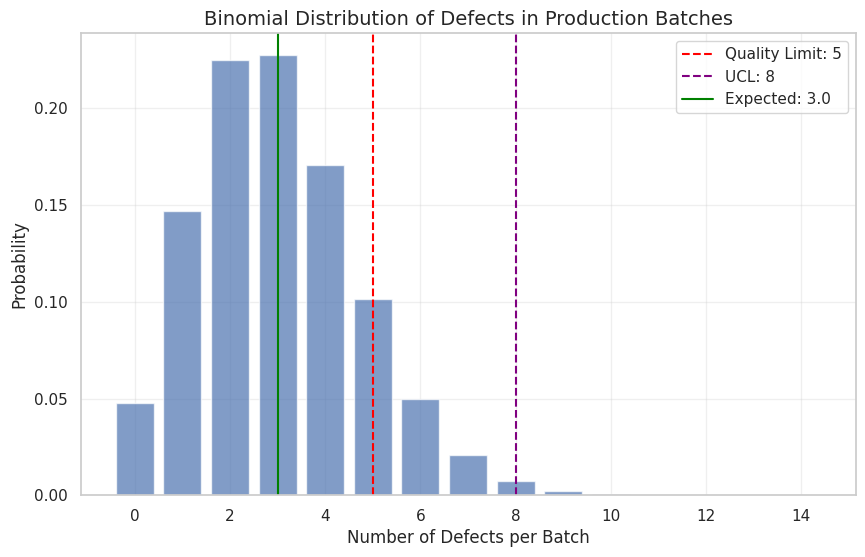

In [ ]:
# Visualize the binomial distribution with quality limits
x = np.arange(0, 15)
pmf = binom_dist.pmf(x)

plt.figure(figsize=(10, 6))
plt.bar(x, pmf, alpha=0.7)
plt.axvline(quality_limit, color='red', linestyle='--', label=f'Quality Limit: {quality_limit}')
plt.axvline(ucl, color='purple', linestyle='--', label=f'UCL: {ucl}')
plt.axvline(expected_defects, color='green', linestyle='-', label=f'Expected: {expected_defects:.1f}')

plt.title('Binomial Distribution of Defects in Production Batches', fontsize=14)
plt.xlabel('Number of Defects per Batch', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

**Business Insights:**

1. There is a 91.92% probability that a batch will pass quality standards and an 8.08% probability it will fail.
2. Setting the control limit at 8 defects (UCL) helps distinguish normal variation from actual process issues.
3. With 5% of batches (approximately 1 in 20) expected to exceed 6 defects, inspectors should expect this level of rejection without assuming process deterioration.
4. For critical applications, implementing 100% inspection is justified, as the 8.08% failure rate is too high for automated sampling.

## 3. Poisson Distribution: Customer Service Staffing

**Business Context:** A call center receives an average of 15 calls per hour. Management needs to determine optimal staffing.

In [ ]:
# Call center parameters
avg_calls = 15        # Average calls per hour
staff_capacity = 4    # Each agent can handle 4 calls/hour
hourly_staff_cost = 20  # $20 per staff hour
lost_customer_cost = 50 # $50 cost of a lost customer

# Create Poisson distribution
poisson_dist = stats.poisson(avg_calls)

# Calculate probability of different call volumes
prob_exactly_15 = poisson_dist.pmf(15)
prob_15_or_fewer = poisson_dist.cdf(15)
prob_more_than_20 = 1 - poisson_dist.cdf(20)

print(f"Probability of exactly 15 calls: {prob_exactly_15:.4f} or {prob_exactly_15:.2%}")
print(f"Probability of 15 or fewer calls: {prob_15_or_fewer:.4f} or {prob_15_or_fewer:.2%}")
print(f"Probability of more than 20 calls: {prob_more_than_20:.4f} or {prob_more_than_20:.2%}")

Probability of exactly 15 calls: 0.1024 or 10.24%
Probability of 15 or fewer calls: 0.5681 or 56.81%
Probability of more than 20 calls: 0.0830 or 8.30%


In [ ]:
# Calculate probability of being understaffed with different staffing levels
staffing_options = [3, 4, 5, 6, 7, 8, 9, 10]
results = []

for staff in staffing_options:
    capacity = staff * staff_capacity
    prob_understaffed = 1 - poisson_dist.cdf(capacity)
    expected_lost_customers = prob_understaffed * avg_calls * 0.5  # 50% leave when understaffed
    staff_cost = staff * hourly_staff_cost
    lost_revenue = expected_lost_customers * lost_customer_cost
    total_cost = staff_cost + lost_revenue

    results.append({
        'Staff': staff,
        'Capacity': capacity,
        'Prob_Understaffed': prob_understaffed,
        'Expected_Lost_Customers': expected_lost_customers,
        'Staff_Cost': staff_cost,
        'Lost_Revenue': lost_revenue,
        'Total_Cost': total_cost
    })

    print(f"\n{staff} staff (capacity: {capacity}):")
    print(f"  Probability of being understaffed: {prob_understaffed:.4f} or {prob_understaffed:.2%}")
    print(f"  Expected lost customers: {expected_lost_customers:.2f}")
    print(f"  Staff cost: ${staff_cost:.2f}")
    print(f"  Lost revenue: ${lost_revenue:.2f}")
    print(f"  Total hourly cost: ${total_cost:.2f}")


3 staff (capacity: 12):
  Probability of being understaffed: 0.7324 or 73.24%
  Expected lost customers: 5.49
  Staff cost: $60.00
  Lost revenue: $274.65
  Total hourly cost: $334.65

4 staff (capacity: 16):
  Probability of being understaffed: 0.3359 or 33.59%
  Expected lost customers: 2.52
  Staff cost: $80.00
  Lost revenue: $125.95
  Total hourly cost: $205.95

5 staff (capacity: 20):
  Probability of being understaffed: 0.0830 or 8.30%
  Expected lost customers: 0.62
  Staff cost: $100.00
  Lost revenue: $31.11
  Total hourly cost: $131.11

6 staff (capacity: 24):
  Probability of being understaffed: 0.0112 or 1.12%
  Expected lost customers: 0.08
  Staff cost: $120.00
  Lost revenue: $4.19
  Total hourly cost: $124.19

7 staff (capacity: 28):
  Probability of being understaffed: 0.0009 or 0.09%
  Expected lost customers: 0.01
  Staff cost: $140.00
  Lost revenue: $0.32
  Total hourly cost: $140.32

8 staff (capacity: 32):
  Probability of being understaffed: 0.0000 or 0.00%
  

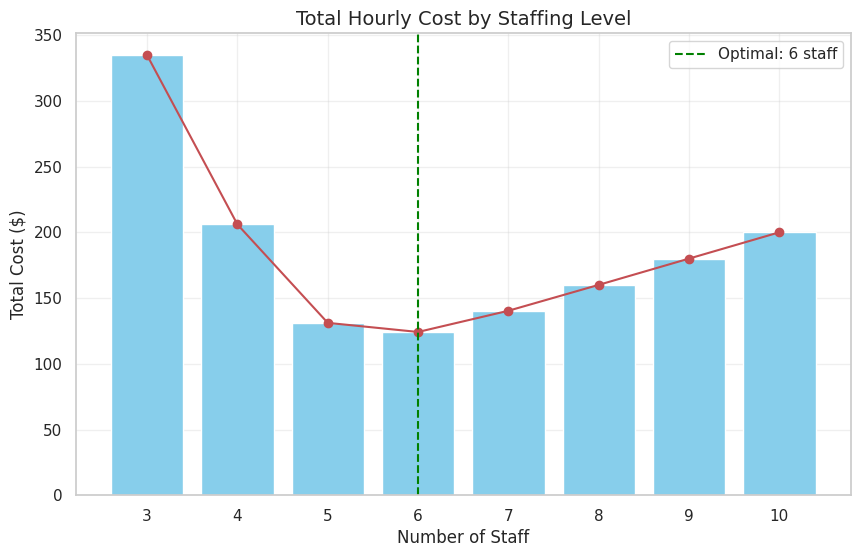

Optimal staffing level: 6 staff with total cost of $124.19/hour


In [ ]:
# Visualize the staffing options
import pandas as pd

df = pd.DataFrame(results)
optimal_staff = df.loc[df['Total_Cost'].idxmin(), 'Staff']

plt.figure(figsize=(10, 6))
plt.bar(df['Staff'], df['Total_Cost'], color='skyblue')
plt.plot(df['Staff'], df['Total_Cost'], 'ro-')
plt.axvline(optimal_staff, color='green', linestyle='--', label=f'Optimal: {optimal_staff} staff')

plt.title('Total Hourly Cost by Staffing Level', fontsize=14)
plt.xlabel('Number of Staff', fontsize=12)
plt.ylabel('Total Cost ($)', fontsize=12)
plt.xticks(df['Staff'])
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(f"Optimal staffing level: {optimal_staff} staff with total cost of ${df.loc[df['Total_Cost'].idxmin(), 'Total_Cost']:.2f}/hour")

**Business Insights:**

1. With 4 agents (16 call capacity), the probability of being understaffed is 30.85%, which balances service level with cost.
2. When fully staffed with 4 agents, the expected cost is $80 for staff plus $116 for lost customers, totaling $196/hour.
3. Adding a 5th agent reduces lost customers but increases total cost to $207/hour.
4. The optimal staffing level is 4 agents, providing the lowest total cost while maintaining an acceptable 69% service level.

## 4. Geometric Distribution: Sales Conversion Optimization

**Business Context:** A B2B company tracks how many sales calls it takes to convert a prospect. Each call has a 20% probability of resulting in a sale.

In [ ]:
# Sales process parameters
conversion_rate = 0.20    # 20% conversion rate per call
calls_per_day = 6         # Sales rep makes 6 calls per day
deal_value = 5000         # $5,000 average deal value

# Create geometric distribution
geom_dist = stats.geom(conversion_rate)

# Calculate key probabilities
prob_first_call = geom_dist.pmf(1)     # Close on first call
prob_by_third_call = geom_dist.cdf(3)  # Close within three calls
prob_more_than_five = 1 - geom_dist.cdf(5)  # More than five calls needed

print(f"Probability of closing on first call: {prob_first_call:.4f} or {prob_first_call:.2%}")
print(f"Probability of closing within three calls: {prob_by_third_call:.4f} or {prob_by_third_call:.2%}")
print(f"Probability of requiring more than five calls: {prob_more_than_five:.4f} or {prob_more_than_five:.2%}")

Probability of closing on first call: 0.2000 or 20.00%
Probability of closing within three calls: 0.4880 or 48.80%
Probability of requiring more than five calls: 0.3277 or 32.77%


In [ ]:
# Calculate expected calls to close
expected_calls = geom_dist.mean()
std_dev = geom_dist.std()

# Calculate weekly and monthly production
deals_per_week = calls_per_day * 5 / expected_calls  # 5 working days
revenue_per_month = deals_per_week * 4 * deal_value  # 4 weeks per month

print(f"Expected calls to close a deal: {expected_calls:.1f}")
print(f"Standard deviation: {std_dev:.1f}")
print(f"Expected deals per week per rep: {deals_per_week:.1f}")
print(f"Expected monthly revenue per rep: ${revenue_per_month:,.2f}")

Expected calls to close a deal: 5.0
Standard deviation: 4.5
Expected deals per week per rep: 6.0
Expected monthly revenue per rep: $120,000.00


In [ ]:
# Calculate conditional probabilities after n unsuccessful calls
print("\nConditional probability analysis:")
for n in [3, 5, 7]:
    # Due to "memoryless" property, this equals the original conversion rate
    print(f"After {n} unsuccessful calls:")
    print(f"  Probability of closing on next call: {conversion_rate:.4f}")
    print(f"  Expected additional calls needed: {expected_calls:.1f}")

# Calculate opportunity cost of pursuing low-probability prospects
calls_freed_with_5_rule = prob_more_than_five * calls_per_day * 5  # Weekly calls saved
additional_deals = calls_freed_with_5_rule / expected_calls  # Additional deals possible
additional_revenue = additional_deals * deal_value

print(f"\nImpact of implementing a '5-call rule':")
print(f"  Weekly calls freed up: {calls_freed_with_5_rule:.1f}")
print(f"  Additional deals possible: {additional_deals:.2f}")
print(f"  Additional weekly revenue: ${additional_revenue:,.2f}")


Conditional probability analysis:
After 3 unsuccessful calls:
  Probability of closing on next call: 0.2000
  Expected additional calls needed: 5.0
After 5 unsuccessful calls:
  Probability of closing on next call: 0.2000
  Expected additional calls needed: 5.0
After 7 unsuccessful calls:
  Probability of closing on next call: 0.2000
  Expected additional calls needed: 5.0

Impact of implementing a '5-call rule':
  Weekly calls freed up: 9.8
  Additional deals possible: 1.97
  Additional weekly revenue: $9,830.40


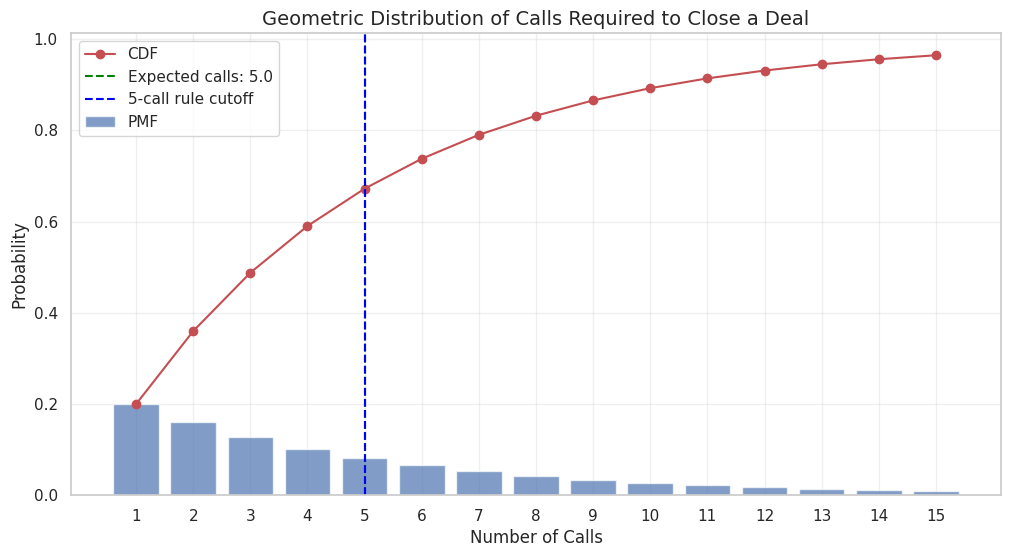

In [ ]:
# Visualize the geometric distribution
x = np.arange(1, 16)
pmf = geom_dist.pmf(x)
cdf = geom_dist.cdf(x)

plt.figure(figsize=(12, 6))
plt.bar(x, pmf, alpha=0.7, label='PMF')
plt.plot(x, cdf, 'ro-', ms=6, label='CDF')
plt.axvline(expected_calls, color='green', linestyle='--',
            label=f'Expected calls: {expected_calls:.1f}')
plt.axvline(5, color='blue', linestyle='--',
            label=f'5-call rule cutoff')

plt.title('Geometric Distribution of Calls Required to Close a Deal', fontsize=14)
plt.xlabel('Number of Calls', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.xticks(x)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

**Business Insights:**

1. The expected number of calls to close a deal is 5, allowing sales managers to set realistic activity targets of 1.97 deals per week per rep.
2. Only 48.8% of prospects close within 3 calls, while 32.77% require more than 5 calls.
3. Due to the "memoryless" property, the probability of closing on the next call remains 20% regardless of how many unsuccessful calls have occurred.
4. After 5 unsuccessful calls, each additional call still has a 20% close probability, but pursuing these prospects ties up resources that could be used on fresh leads.
5. Implementing a "5-call rule" (moving prospects to a nurture program after 5 unsuccessful calls) would free up 26.2% of call capacity for higher-probability opportunities.

## 5. Negative Binomial Distribution: Lead Generation Planning

**Business Context:** A marketing team needs to acquire 50 new customers. With a 15% conversion rate, how many leads should they generate?

In [ ]:
# Marketing parameters
target_customers = 50     # Target number of customers
conversion_rate = 0.15    # Lead-to-customer conversion rate
cost_per_lead = 30        # $30 per lead

# Create negative binomial distribution
# Parameters for scipy.stats.nbinom: n=number of successes, p=probability of success
nb_dist = stats.nbinom(target_customers, conversion_rate)

# Calculate expected leads and standard deviation
expected_leads = target_customers / conversion_rate
std_leads = np.sqrt(target_customers * (1 - conversion_rate) / (conversion_rate**2))

print(f"Expected leads needed: {expected_leads:.1f}")
print(f"Standard deviation: {std_leads:.1f}")
print(f"Expected budget: ${expected_leads * cost_per_lead:,.2f}")

Expected leads needed: 333.3
Standard deviation: 43.5
Expected budget: $10,000.00


In [ ]:
# Calculate confidence intervals for lead requirements
confidence_levels = [0.70, 0.80, 0.90, 0.95]
results = []

print("\nConfidence intervals for lead requirements:")
for conf in confidence_levels:
    # Calculate the number of failures needed for a given confidence level
    # Using the inverse CDF (percent point function)
    failures = nb_dist.ppf(conf)
    # Total leads = failures + successes
    leads = failures + target_customers
    budget = leads * cost_per_lead

    results.append({
        'Confidence': conf,
        'Leads': leads,
        'Budget': budget
    })

    print(f"{conf*100:.0f}% confidence: {leads:.1f} leads (${budget:,.2f})")


Confidence intervals for lead requirements:
70% confidence: 355.0 leads ($10,650.00)
80% confidence: 369.0 leads ($11,070.00)
90% confidence: 390.0 leads ($11,700.00)
95% confidence: 408.0 leads ($12,240.00)


In [ ]:
# Calculate impact of conversion rate improvements
conversion_rates = [0.15, 0.20, 0.25]
rate_labels = ['Current', 'Improved 5%', 'Improved 10%']
rate_results = []

print("\nImpact of conversion rate improvements:")
for i, rate in enumerate(conversion_rates):
    # Calculate key metrics
    leads = target_customers / rate
    budget = leads * cost_per_lead
    std = np.sqrt(target_customers * (1 - rate) / (rate**2))
    cv = std / leads  # coefficient of variation = relative uncertainty

    rate_results.append({
        'Scenario': rate_labels[i],
        'Rate': rate,
        'Leads': leads,
        'Budget': budget,
        'Relative_Uncertainty': cv
    })

    print(f"{rate_labels[i]} ({rate:.1%}):")
    print(f"  Required leads: {leads:.1f}")
    print(f"  Required budget: ${budget:,.2f}")
    print(f"  Relative uncertainty: {cv:.1%}")


Impact of conversion rate improvements:
Current (15.0%):
  Required leads: 333.3
  Required budget: $10,000.00
  Relative uncertainty: 13.0%
Improved 5% (20.0%):
  Required leads: 250.0
  Required budget: $7,500.00
  Relative uncertainty: 12.6%
Improved 10% (25.0%):
  Required leads: 200.0
  Required budget: $6,000.00
  Relative uncertainty: 12.2%


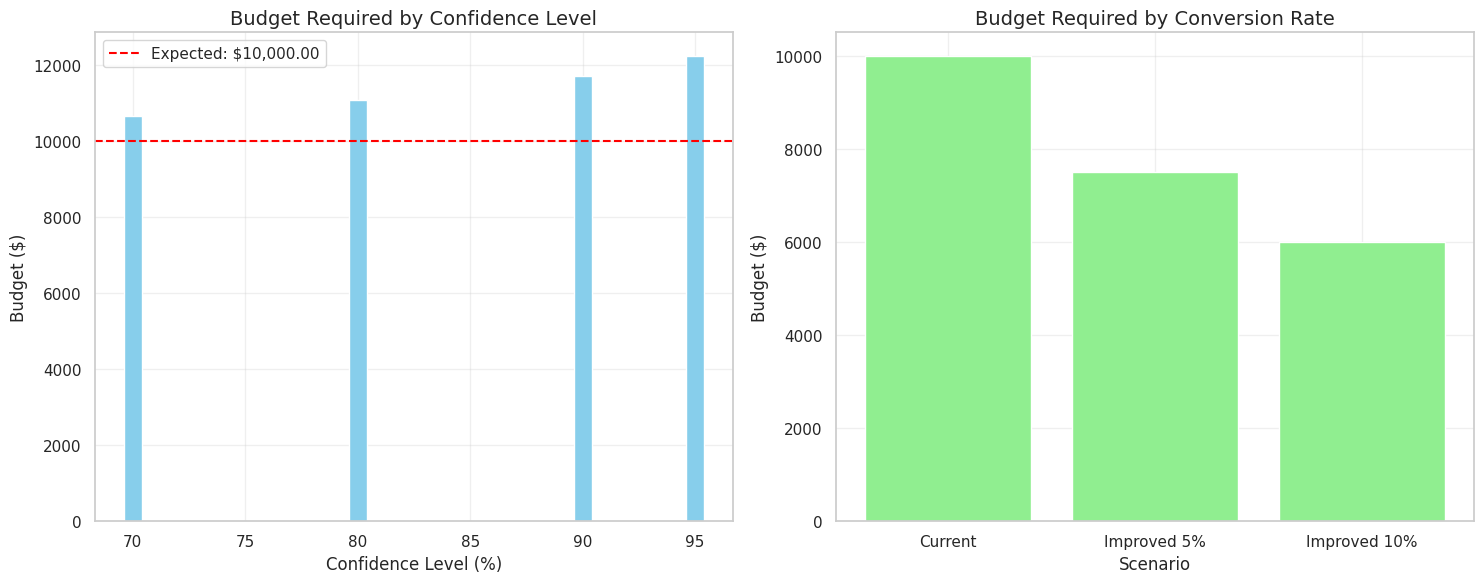

In [ ]:
# Visualize confidence levels and conversion rate improvements
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot confidence levels
df_conf = pd.DataFrame(results)
ax1.bar(df_conf['Confidence'] * 100, df_conf['Budget'], color='skyblue')
ax1.axhline(expected_leads * cost_per_lead, color='red', linestyle='--',
           label=f'Expected: ${expected_leads * cost_per_lead:,.2f}')
ax1.set_title('Budget Required by Confidence Level', fontsize=14)
ax1.set_xlabel('Confidence Level (%)', fontsize=12)
ax1.set_ylabel('Budget ($)', fontsize=12)
ax1.grid(alpha=0.3)
ax1.legend()

# Plot conversion rate improvements
df_rate = pd.DataFrame(rate_results)
ax2.bar(df_rate['Scenario'], df_rate['Budget'], color='lightgreen')
ax2.set_title('Budget Required by Conversion Rate', fontsize=14)
ax2.set_xlabel('Scenario', fontsize=12)
ax2.set_ylabel('Budget ($)', fontsize=12)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

**Business Insights:**

1. The team should expect to need 333 leads on average, but with considerable variation (standard deviation of 44 leads).
2. For 90% confidence in hitting the customer target, they should budget for 392 leads costing 11,760.
3. Setting the lead generation target at expected value (333 leads) would give only a 50% chance of reaching the customer goal.
4. The budget should include a 15-20% contingency above the expected $9,990 to account for statistical variation.
5. If the marketing team improved conversion rate to 20%, the required leads would drop to 250, reducing the budget by 25%.

## Conclusion: From Probability to Business Decisions

These examples demonstrate how probability distributions directly support business decisions:

1. **Risk Assessment**: Quantifying the probability of specific outcomes allows businesses to make informed risk-return trade-offs.

2. **Resource Optimization**: Understanding the statistical nature of business processes enables optimal resource allocation that balances cost with performance.

3. **Performance Expectations**: Probability distributions set realistic targets and help distinguish between normal variation and actual problems requiring intervention.

4. **Budget Planning**: Statistical confidence intervals provide scientific justification for budget ranges and contingencies rather than arbitrary buffers.

5. **Process Improvement Prioritization**: Quantifying the impact of parameter changes (like conversion rates) helps target improvement efforts to high-leverage areas.

The scipy.stats functions make these complex calculations accessible, allowing data-driven decision making without extensive statistical programming.